In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
x={'op1':[1,2,4,6,20,0],'op2':[2,3,5,7,100,55]}

In [3]:
x1={'op1':[5,1,10,100,30,1],'op2':[10,3,0,15,40,1]}

In [4]:
y={'out':[3,5,9,13,120,55]}

In [5]:
y1={'out':[15,4,10,115,70,2]}

In [6]:
train_x=pd.DataFrame(data=x)

In [7]:
test_x=pd.DataFrame(data=x1)

In [8]:
train_y=pd.DataFrame(data=y)

In [9]:
exp_y=pd.DataFrame(data=y1)

In [10]:
train_x.describe()

,op1,op2
count,6.000000,6.000000
mean,5.500000,28.666667
std,7.422937,40.450793
min,0.000000,2.000000
25%,1.250000,3.500000
50%,3.000000,6.000000
75%,5.500000,43.000000
max,20.000000,100.000000


In [11]:
train_x.head()

,op1,op2
0,1,2
1,2,3
2,4,5
3,6,7
4,20,100


In [12]:
model = DecisionTreeRegressor(max_leaf_nodes=450)

In [13]:
model_r=RandomForestRegressor(max_leaf_nodes=400)

In [14]:
model_l=LinearRegression()

In [15]:
model.fit(train_x, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=450, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [16]:
model_r.fit(train_x, train_y.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=400,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
model_l.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
preds=model.predict(test_x)
print(preds)

[13.  5.  3. 13. 55.  3.]


In [19]:
preds_r=model_r.predict(test_x)
print(preds_r)

[11.   9.6  7.  55.  64.2  9.2]


In [28]:
preds_l=model_l.predict(test_x)
print(preds_l.reshape(1,-1))

[[ 15.   4.  10. 115.  70.   2.]]


In [21]:
print(mean_absolute_error(exp_y,preds))

21.333333333333332


In [22]:
print(mean_absolute_error(exp_y,preds_r))

14.266666666666666


In [31]:
print(mean_absolute_error(exp_y,preds_l))

3.515706244646329e-14


In [24]:
model.score(train_x, train_y)

1.0

In [25]:
model_r.score(train_x, train_y)

0.952791418206729

In [26]:
model_l.score(train_x, train_y)


1.0

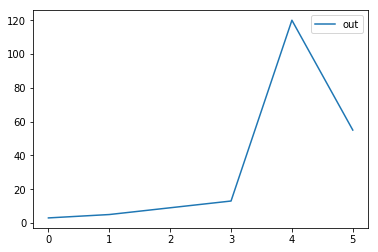

In [36]:
train_y.plot()